In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


epl = f"https://www.transfermarkt.co.uk/premier-league/formtabelle/wettbewerb/GB1?saison_id=2024&min=1&max="
ll = f"https://www.transfermarkt.co.uk/laliga/formtabelle/wettbewerb/ES1?saison_id=2024&min=1&max="
bl = f"https://www.transfermarkt.co.uk/bundesliga/formtabelle/wettbewerb/L1?saison_id=2024&min=1&max="
sa = f"https://www.transfermarkt.co.uk/serie-a/formtabelle/wettbewerb/IT1?saison_id=2024&min=1&max="
efl = f"https://www.transfermarkt.co.uk/championship/formtabelle/wettbewerb/GB2?saison_id=2024&min=1&max="
lp = f"https://www.transfermarkt.co.uk/liga-nos/formtabelle/wettbewerb/PO1?saison_id=2024&min=1&max="


def fetch_league_data(matchday,league):
    """
    Fetches Premier League data from Transfermarkt for a given matchday.
    
    Args:
        matchday (int): The matchday to fetch data for.

    Returns:
        tuple: A list of club names and a cleaned pandas DataFrame containing the league data.
    """
 

    url = league + str(matchday)
    
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:133.0) Gecko/20100101 Firefox/133.0"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    
    liga = soup.find("div", {"class": "data-header__headline-wrapper data-header__headline-wrapper--oswald"}).get_text(strip=True)
    syear = soup.find('option', {'selected': 'selected'})["value"]
    syear_short = soup.find('option', {'selected': 'selected'}).getText()
    syear_long = syear+"/"+ str(int(syear)+1)

    # Extract the table from the page
    table = soup.find_all('table')[1]
    table_rows = table.find_all('tr')
    
    # Extract data from rows
    l = []
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        l.append(row)
    
    # Create a DataFrame with the appropriate columns based on row length
    if len(l[0]) == 11:
        tb = pd.DataFrame(l, columns=["#", "badge", "Club", "MP", "W", "D", "L", "Goals", "+/-", "Pts", "Form"])
    else:
        tb = pd.DataFrame(l, columns=["#", "badge", "Club", "MP", "W", "D", "L", "Goals", "+/-", "Pts"])
    
    # Clean the DataFrame
    tb = tb.drop(columns=['badge'])
    tb = tb.replace(r'\n', ' ', regex=True)
    tb = tb.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    # Extract the club names into a list
    clubs = tb["Club"].tolist()
    
    return clubs, tb, liga, syear, syear_long, syear_short


lp = f"https://www.transfermarkt.co.uk/liga-nos/formtabelle/wettbewerb/PO1?saison_id=2024&min=1&max="
# Example usage
# matchday = 19
# clubs, tb, liga, syear, syear_long, syear_short = fetch_league_data(matchday, sa)
# print(clubs)
# print(tb.head())
# print(liga)
# print(syear, syear_short, syear_long)




In [3]:
teams_data = {}  # Initialize the dictionary to store points per matchweek

def add_points(team_name, matchweek, points):
    """
    Adds points for a specific matchweek to the `teams_data` dictionary.

    Args:
        team_name (str): Name of the team.
        matchweek (str): Matchweek identifier (e.g., 'matchweek_13').
        points (int): Points to add for the given matchweek.
    """
    if team_name not in teams_data:
        teams_data[team_name] = {}  # Initialize a new dictionary for the team if it doesn't exist
    teams_data[team_name][matchweek] = points  # Add or update points for the specific matchweek


def save_points_from_matchweeks(start_matchweek, end_matchweek, league):
    global liga, syear, syear_long, syear_short
    """
    Saves points for all teams across multiple matchweeks into `teams_data`.

    Args:
        start_matchweek (int): The starting matchweek.
        end_matchweek (int): The ending matchweek.
    """
    for matchweek in range(start_matchweek, end_matchweek + 1):
        clubs, tb, liga, syear, syear_long, syear_short = fetch_league_data(matchweek, league)  # Fetch data for the current matchweek
        matchweek_label = f"matchweek_{matchweek}"  # Generate matchweek label
        for club in clubs:
            # Get points for the current club from the DataFrame
            points = int(tb.query(f'Club == "{club}"')["Pts"].iloc[0])
            add_points(club, matchweek_label, points)  # Add points to the dictionary




In [6]:
teams_data = {}  # Initialize the dictionary to store points per matchweek

# # Example usage:
save_points_from_matchweeks(1, 16, epl)  # Save points from matchweek 1 to matchweek 30

# # Print the resulting dictionary
print(teams_data)



{'Brighton': {'matchweek_1': 3, 'matchweek_2': 6, 'matchweek_3': 7, 'matchweek_4': 8, 'matchweek_5': 9, 'matchweek_6': 9, 'matchweek_7': 12, 'matchweek_8': 15, 'matchweek_9': 16, 'matchweek_10': 16, 'matchweek_11': 19, 'matchweek_12': 22, 'matchweek_13': 23, 'matchweek_14': 23, 'matchweek_15': 24, 'matchweek_16': 24}, 'Arsenal': {'matchweek_1': 3, 'matchweek_2': 6, 'matchweek_3': 7, 'matchweek_4': 10, 'matchweek_5': 11, 'matchweek_6': 14, 'matchweek_7': 17, 'matchweek_8': 17, 'matchweek_9': 18, 'matchweek_10': 18, 'matchweek_11': 19, 'matchweek_12': 22, 'matchweek_13': 25, 'matchweek_14': 28, 'matchweek_15': 29, 'matchweek_16': 30}, 'Liverpool': {'matchweek_1': 3, 'matchweek_2': 6, 'matchweek_3': 9, 'matchweek_4': 9, 'matchweek_5': 12, 'matchweek_6': 15, 'matchweek_7': 18, 'matchweek_8': 21, 'matchweek_9': 22, 'matchweek_10': 25, 'matchweek_11': 28, 'matchweek_12': 31, 'matchweek_13': 34, 'matchweek_14': 35, 'matchweek_15': 35, 'matchweek_16': 36}, 'Man City': {'matchweek_1': 3, 'match

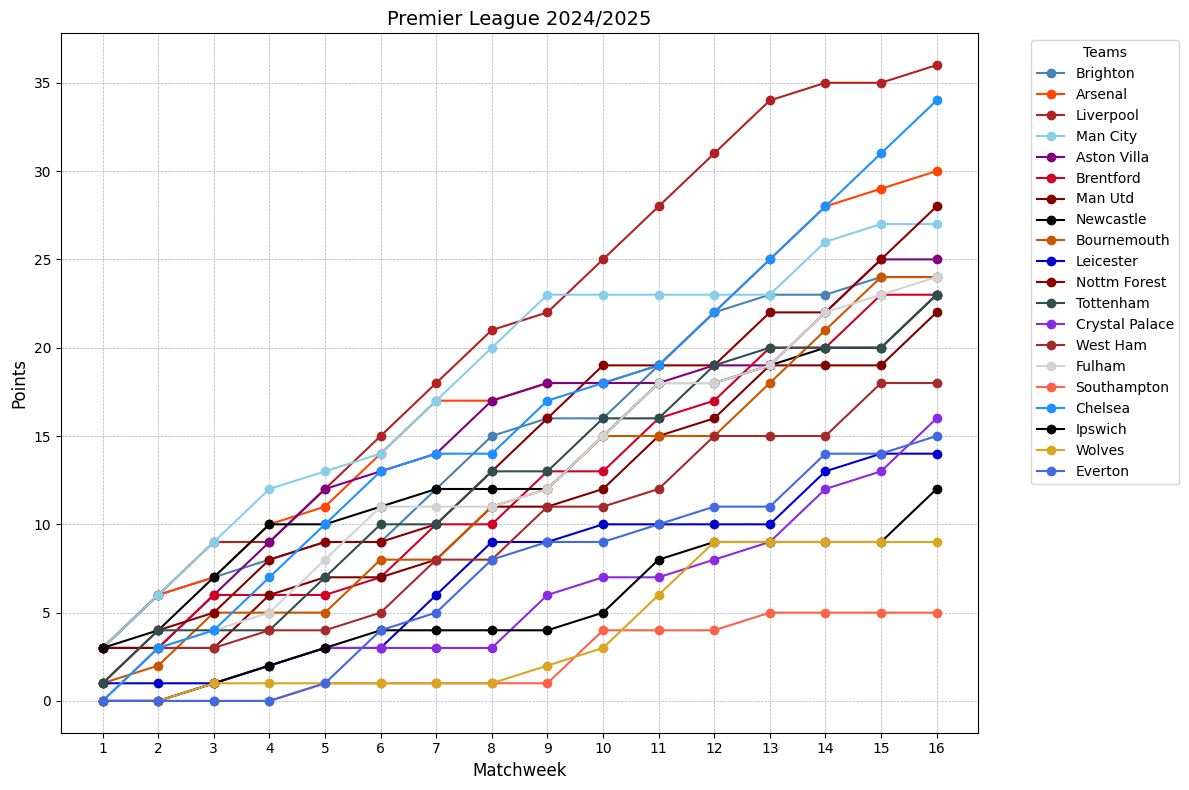

In [7]:

# Primary colors for each team
team_colors = {
    'Arsenal': '#ff4500',       # Orange Red
    'Man City': '#87ceeb',      # Sky Blue
    'Newcastle': '#000000',     # Black
    'Man Utd': '#800000',       # Maroon
    'Tottenham': '#2f4f4f',     # Dark Slate Gray
    'Brighton': '#4682b4',      # Steel Blue
    'Liverpool': '#b22222',     # Dark Red
    'Fulham': '#d3d3d3',        # Light Gray
    'Brentford': '#d00027',     # Red
    'Chelsea': '#1e90ff',       # Dodger Blue
    'Aston Villa': '#800080',   # Purple
    'Crystal Palace': '#8a2be2',# Blue Violet
    'Leeds': '#ffffff',         # White
    'Leicester': '#0000cd',     # Medium Blue
    'Nottm Forest': '#8b0000',  # Dark Red
    'Bournemouth': '#cc5500',   # Burnt Orange
    'West Ham': '#a52a2a',      # Brown
    'Everton': '#4169e1',       # Royal Blue
    'Wolves': '#daa520',        # Goldenrod
    'Southampton': '#ff6347',   # Tomato
}

# team_colors = {
#     'Atalanta BC': '#0060A2',   # Blue
#     'Napoli': '#0096D6',         # Sky Blue
#     'Inter': 'pink',          # Black
#     'Fiorentina': '#5F1F69',     # Purple
#     'Lazio': '#004C97',          # Lazio Blue
#     'Juventus': '#000000',       # Black
#     'AC Milan': '#F1C0C6',       # Light Pink
#     'Bologna': '#A10000',        # Bologna Red
#     'FC Empoli': '#0062A1',      # Empoli Blue
#     'Udinese Calcio': '#000000', # Black
#     'AS Roma': '#D12F2B',        # Roma Red
#     'Torino': '#8C1C1C',         # Torino Red
#     'Parma': '#1E1A8B',          # Parma Blue
#     'Genoa': '#E30000',          # Genoa Red
#     'Cagliari Calcio': '#003D6F',# Blue
#     'Lecce': '#F9A800',          # Yellow
#     'Como': '#005BA6',           # Como Blue
#     'Hellas Verona': '#F9C900',  # Hellas Yellow
#     'Monza': '#9E1B32',          # Monza Red
#     'Venezia': '#2A6E3E'         # Green
# }


def plot_league():
        # Prepare the data for plotting
    plt.figure(figsize=(12, 8))

    for team, matchweek_data in teams_data.items():
        matchweeks = []
        points = []

        # Extract matchweeks and points for the current team
        for mw, pts in matchweek_data.items():
            matchweeks.append(int(mw.split('_')[1]))  # Extract matchweek number
            points.append(int(pts))  # Convert points to integer
        
        # Plot points vs matchweeks for the current team using primary colors
        plt.plot(
            matchweeks, 
            points, 
            marker='o', 
            label=team, 
            color=team_colors.get(team, 'black')  # Default to black if the team is not in the color dictionary
        )

    # Adding titles and labels
    plt.title(f'{liga} {syear_long}', fontsize=14)
    plt.xlabel('Matchweek', fontsize=12)
    plt.ylabel('Points', fontsize=12)
    plt.xticks(sorted({int(mw.split('_')[1]) for mw_data in teams_data.values() for mw in mw_data.keys()}))  # Unique sorted matchweeks
    plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    

plot_league()

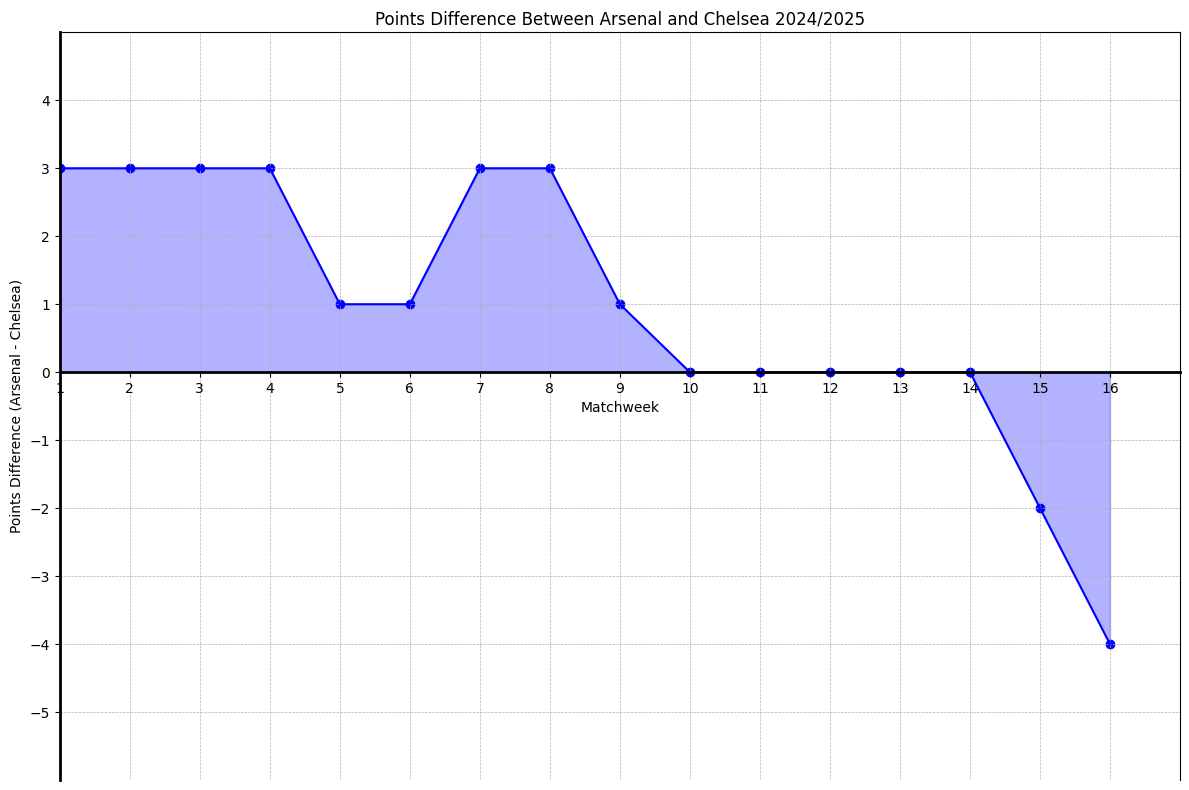

In [8]:
def compare_points(team1, team2):
        
    plt.figure(figsize=(12, 8))

    # Lists to store the x and y values for plotting lines
    x_values = []
    y_values_team1 = []

    # Loop through matchweeks for Arsenal
    for x in teams_data[team1]:
        matchweek = int(x.replace("matchweek_", ""))
        team1_points = teams_data[team1][x]
        team2_points = teams_data[team2][x]
        
        # Calculate the difference and plot the scatter points
        plt.scatter(matchweek, team1_points - team2_points, marker='o', color="blue", label="Arsenal vs Man City" if matchweek == 1 else "")

        # Store values for line plot
        x_values.append(matchweek)
        y_values_team1.append(team1_points - team2_points)

    # Plot lines for the difference between Arsenal and Man City points
    plt.plot(x_values, y_values_team1, linestyle='-', color='blue')

    # Move the x-axis to y=0 by adjusting the spines
    plt.gca().spines['bottom'].set_position(('data', 0))
    plt.gca().spines['bottom'].set_linewidth(2)  # Make the x-axis line thick
    plt.gca().spines['left'].set_linewidth(2)    # Make the y-axis line thick

    # Label the axes
    plt.xlabel('Matchweek')
    plt.ylabel(f'Points Difference ({team1} - {team2})')
    plt.title(f'Points Difference Between {team1} and {team2} {syear_long}')

    # Set the x-axis and y-axis limits to give space around the data
    plt.xlim(1, max(x_values) + 1)  # Adjust based on your data
    plt.ylim(min(y_values_team1) - 2, max(y_values_team1) + 2)  # Adjust the y limits

    # Show the x-axis numbers by ensuring the ticks are visible
    plt.xticks(x_values)  # Ensure matchweek values are on the x-axis
    plt.fill_between(x_values, y_values_team1, color='blue', alpha=0.3)  # alpha controls transparency
    # Remove the default x-axis ticks at the bottom and move the numbers up
    plt.gca().axes.get_xaxis().set_visible(True)
    plt.yticks(range(min(y_values_team1) - 1, max(y_values_team1) + 2, 1))  # Create ticks from y_min to y_max with a step of 1
    # Add grid and show the plot
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Show the plot
    plt.tight_layout()
    plt.show()

compare_points("Arsenal", "Chelsea")